In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

labels=np.load(r"activation_maps_lines_image52_labelpixel.npy")
features=np.load(r"activation_maps_lines_image52_pixel.npy")
print(features.shape,labels.shape)

(16384, 13) (16384, 1)


In [3]:
# Reshape your data into a 2D format (pixels x features)
pixels = features.shape[0]   # Total number of pixels
feature_pixel = features.shape[1]  # Number of features for each pixel

In [4]:
features_reshaped = features.reshape(pixels, feature_pixel)
labels_reshaped = labels.reshape(pixels)  # Assuming y is your pixel-wise label mask
print(features_reshaped.shape,labels_reshaped.shape)

(16384, 13) (16384,)


In [5]:
# Split the reshaped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, labels_reshaped, test_size=0.2, random_state=42)

In [11]:
zero_rows = (labels == 0).any(axis=1)
class1 = features[zero_rows]
class1

array([[0.00784314, 0.00784314, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.00784314, 0.00784314, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.00392157, 0.00784314, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.0745098 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0745098 ]])

In [12]:
one_rows = (labels == 255).any(axis=1)
class2 = features[one_rows]
class2

array([[0.00392157, 0.01176471, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.        , 0.01176471, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.        , 0.01176471, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0745098 ]])

In [15]:
mean1=np.mean(class1,axis=0)
mean2=np.mean(class2,axis=0)
class1_std=np.std(class1,axis=0)
class2_std=np.std(class2,axis=0)
mean1,mean2,class1_std,class2_std

(array([8.11570501e-03, 5.52290421e-03, 3.07575680e-03, 1.68480946e-03,
        1.47271767e-03, 7.93853597e-04, 1.38549599e-02, 3.53486312e-04,
        4.42922608e-05, 0.00000000e+00, 5.88576004e-04, 2.34237918e-04,
        7.44621046e-02]),
 array([8.09816004e-03, 5.39862952e-03, 3.15045913e-03, 1.75365921e-03,
        1.53919843e-03, 8.87617371e-04, 1.85497791e-02, 3.93969207e-04,
        6.99047225e-05, 0.00000000e+00, 5.92464098e-04, 2.49844656e-04,
        7.44821872e-02]),
 array([0.01164252, 0.00631803, 0.00514177, 0.0030254 , 0.00216689,
        0.00158841, 0.08188406, 0.00112603, 0.00041441, 0.        ,
        0.00162988, 0.00096809, 0.00042986]),
 array([0.01289548, 0.00675134, 0.00542588, 0.00315884, 0.00218254,
        0.00166051, 0.09514568, 0.00118032, 0.00051889, 0.        ,
        0.00160778, 0.00099929, 0.00032793]))

In [16]:
np.linalg.norm(mean1-mean2)

0.004699315708851366

In [18]:
np.histogram(features[:][1])

(array([11,  1,  0,  0,  0,  0,  0,  0,  0,  1], dtype=int64),
 array([0.        , 0.00745098, 0.01490196, 0.02235294, 0.02980392,
        0.0372549 , 0.04470588, 0.05215686, 0.05960784, 0.06705882,
        0.0745098 ]))

In [19]:
def minkowski_distance(x, y, r):
    d = 0
    for i in range(len(x)):
        d += abs(x[i] - y[i])**r
    return d**(1/r)
distance=[minkowski_distance(features[:][0], features[:][1], r) for r in range(1,11)]
distance

[0.00392156862745098,
 0.00392156862745098,
 0.003921568627450981,
 0.00392156862745098,
 0.0039215686274509795,
 0.003921568627450981,
 0.003921568627450981,
 0.00392156862745098,
 0.003921568627450981,
 0.0039215686274509795]

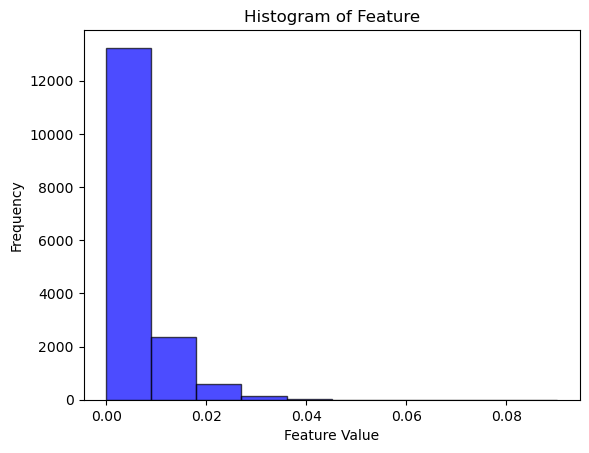

Mean: 0.005316760493259804
Variance: 4.1438383248988045e-05


In [20]:
import matplotlib.pyplot as plt
feature_0 = features[:,1]

# Plot a histogram to observe the density pattern
plt.hist(feature_0, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

# Calculate the mean and variance of the feature
feature_mean = np.mean(feature_0)
feature_variance = np.var(feature_0)

print("Mean:", feature_mean)
print("Variance:", feature_variance)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.15      0.20       936
           1       0.11      0.01      0.01       126
         128       0.13      0.03      0.05       376
         255       0.56      0.83      0.66      1839

    accuracy                           0.51      3277
   macro avg       0.28      0.25      0.23      3277
weighted avg       0.42      0.51      0.44      3277



In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_reshaped, labels_reshaped, test_size=0.2, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.41959108941104667


In [19]:
y_pred = neigh.predict(X_test)
print("Predicted labels for test set:", y_pred)

Predicted labels for test set: [255 255 255 ... 128   1   0]


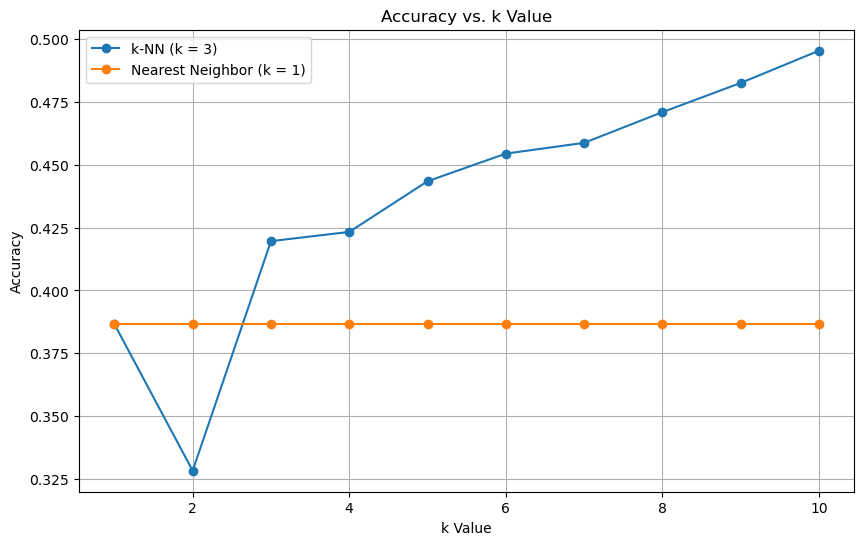

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

k_values = [1,2,3,4,5,6,7,8,9,10]

knn_accuracies = []
nn_accuracies = []

for k in k_values:
    # Train a k-NN classifier with the current k value (k-NN)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_y_pred = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_y_pred)
    knn_accuracies.append(knn_accuracy)

    # Train a nearest neighbor classifier (k = 1)
    nn_classifier = KNeighborsClassifier(n_neighbors=1)
    nn_classifier.fit(X_train, y_train)
    nn_y_pred = nn_classifier.predict(X_test)
    nn_accuracy = accuracy_score(y_test, nn_y_pred)
    nn_accuracies.append(nn_accuracy)

# Plot the accuracy results
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o', label='k-NN (k = 3)')
plt.plot(k_values, nn_accuracies, marker='o', label='Nearest Neighbor (k = 1)')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
#A9
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming you have X_train, X_test, y_train, and y_test from previous code

# Train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred_train = rf_classifier.predict(X_train)
rf_y_pred_test = rf_classifier.predict(X_test)

# Train a KNeighborsClassifier (k = 3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_y_pred_train = knn_classifier.predict(X_train)
knn_y_pred_test = knn_classifier.predict(X_test)

# Function to print metrics
def print_metrics(y_true, y_pred, title):
    print(title)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate RandomForestClassifier on training and test data
print_metrics(y_train, rf_y_pred_train, "RandomForestClassifier (Train)")
print_metrics(y_test, rf_y_pred_test, "RandomForestClassifier (Test)")

# Evaluate KNeighborsClassifier (k = 3) on training and test data
print_metrics(y_train, knn_y_pred_train, "KNeighborsClassifier (Train)")
print_metrics(y_test, knn_y_pred_test, "KNeighborsClassifier (Test)")


RandomForestClassifier (Train)
Accuracy: 0.6554512855725948
Confusion Matrix:
[[1344    8   54 2262]
 [  45   94   11  368]
 [ 155    2  361 1154]
 [ 366    6   85 6792]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.37      0.48      3668
           1       0.85      0.18      0.30       518
         128       0.71      0.22      0.33      1672
         255       0.64      0.94      0.76      7249

    accuracy                           0.66     13107
   macro avg       0.73      0.43      0.47     13107
weighted avg       0.68      0.66      0.61     13107

RandomForestClassifier (Test)
Accuracy: 0.5093072932560269
Confusion Matrix:
[[ 139    1   16  780]
 [  11    1    4  110]
 [  37    1   11  327]
 [ 260    6   55 1518]]
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.15      0.20       936
           1       0.11      0.01      0.01       126
         128   